The Supply Chain Shipment Pricing Dataset contains data related to logistics and shipment pricing, helping analyze factors that influence shipping costs. It includes key attributes such as shipment mode, origin and destination locations, weight, cost, and other logistical details. This dataset is valuable for understanding pricing trends, optimizing supply chain management, and improving cost efficiency. It can be used for regression analysis, predictive modeling, and business intelligence to enhance decision-making in logistics and transportation.

Import necessary libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

Import dataset

In [2]:
df=pd.read_csv("Data.csv")

Basic data understanding

In [3]:
df.head()

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project code                  10324 non-null  object 
 2   pq #                          10324 non-null  object 
 3   po / so #                     10324 non-null  object 
 4   asn/dn #                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed by                    10324 non-null  object 
 7   fulfill via                   10324 non-null  object 
 8   vendor inco term              10324 non-null  object 
 9   shipment mode                 9964 non-null   object 
 10  pq first sent to client date  10324 non-null  object 
 11  po sent to vendor date        10324 non-null  object 
 12  scheduled delivery date       10324 non-null  object 
 13  d

In [5]:
df.isnull().sum()

,0
id,0
project code,0
pq #,0
po / so #,0
asn/dn #,0
country,0
managed by,0
fulfill via,0
vendor inco term,0
shipment mode,360


In [6]:
df.columns

Index(['id', 'project code', 'pq #', 'po / so #', 'asn/dn #', 'country',
       'managed by', 'fulfill via', 'vendor inco term', 'shipment mode',
       'pq first sent to client date', 'po sent to vendor date',
       'scheduled delivery date', 'delivered to client date',
       'delivery recorded date', 'product group', 'sub classification',
       'vendor', 'item description', 'molecule/test type', 'brand', 'dosage',
       'dosage form', 'unit of measure (per pack)', 'line item quantity',
       'line item value', 'pack price', 'unit price', 'manufacturing site',
       'first line designation', 'weight (kilograms)', 'freight cost (usd)',
       'line item insurance (usd)'],
      dtype='object')

In [7]:
df.shape

(10324, 33)

In [8]:
df["first line designation"].unique().shape
df["pq #"].unique()
df["po / so #"]
df["sub classification"].unique()
df["item description"]
df["freight cost (usd)"].unique()
df["vendor inco term"].unique()
df["dosage"].unique()

array([nan, '10mg/ml', '150mg', '30mg', '200mg', '200/50mg', '150/300mg',
       '300mg', '2g', '1mg/ml', '600mg', '25mg', '20mg', '250mg', '400mg',
       '20/120mg', '50+153mg', '600/200/300mg', '100mg', '15mg',
       '80/20mg/ml', '600mg/2ml', '150/200/30mg', '100/25mg', '50mg',
       '300/200mg', '150/300/200mg', '133.3/33.3mg', '80mg/ml', '30/6mg',
       '20mg/ml', '40mg', '300/150/300mg', '500/25mg', '30/50/6mg',
       '150/300+200mg', '150/30mg', '150/200/40mg', '30mg/ml',
       '200/300mg', '150/300+300mg', '300/300mg', '60/100/12mg',
       '600/300/300mg', '300/100mg', '30/60mg', '60/30mg', '30/50/60mg',
       '500mg', '125mg', '600/300mg', '60mg', '60/12mg',
       '150/300mg+600mg', '50mg/g'], dtype=object)

Renamed 'id' column to 'ID'

In [9]:
df=df.rename(columns={"id":"ID"})

Drop duplicate entries in 'ID' column

In [10]:
df.drop_duplicates(subset="ID")

,ID,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",False,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,False,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,False,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,True,1392,Freight Included in Commodity Cost,134.03


Convert date column datatype  from object to date format

In [11]:
df["po sent to vendor date"]=pd.to_datetime(df["po sent to vendor date"],errors="coerce")
df["po sent to vendor date"]=df["po sent to vendor date"].dt.date


<ipython-input-11-daf0114e0dfc>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["po sent to vendor date"]=pd.to_datetime(df["po sent to vendor date"],errors="coerce")


Drop unneccessary column for data analysis

In [12]:
df.drop(["pq #"],axis=1,inplace=True)
df.drop(["asn/dn #"],axis=1,inplace=True)
df.drop(["po / so #"],axis=1,inplace=True)
df.drop("po sent to vendor date",axis=1,inplace=True)
df.drop("pq first sent to client date",axis=1,inplace=True)
df.drop("item description",axis=1,inplace=True)
df.drop("delivery recorded date",axis=1,inplace=True)

In [13]:
df.drop("dosage",axis=1,inplace=True)

Imputing missing entries in 'shipment mode' column with mode of corresponding countries in 'country' column.

In [14]:
missing=df[df["shipment mode"].isna()]
country=missing["country"]

In [15]:
new=df[df["country"]=="Zambia"]
co=new["shipment mode"]
print(co.mode())

0    Truck
Name: shipment mode, dtype: object


In [16]:
df.loc[(df['country'] == 'South Africa')&(df['shipment mode'].isna()),'shipment mode'] = 'Truck'
df.loc[(df["country"]=="Ethiopia")&(df["shipment mode"].isna()),"shipment mode"]="Air"
df.loc[(df["country"]=="Nigeria")&(df["shipment mode"].isna()),"shipment mode"]="Air Charter"
df.loc[(df["country"]=="Guyana")&(df["shipment mode"].isna()),"shipment mode"]="Air"
df.loc[(df["country"]=="Zambia")&(df["shipment mode"].isna()),"shipment mode"]="Truck"
df.loc[(df["country"]=="Côte d'Ivoire")&(df["shipment mode"].isna()),"shipment mode"]="Air"
df.loc[(df["country"]=="Zimbabwe")&(df["shipment mode"].isna()),"shipment mode"]="Truck"
df.loc[(df["country"]=="Namibia")&(df["shipment mode"].isna()),"shipment mode"]="Air"
df.loc[(df["country"]=="Uganda")&(df["shipment mode"].isna()),"shipment mode"]="Air"
df.loc[(df["country"]=="Tanzania")&(df["shipment mode"].isna()),"shipment mode"]="Air"
df.loc[(df["country"]=="Botswana")&(df["shipment mode"].isna()),"shipment mode"]="Air"
df.loc[(df["country"]=="Haiti")&(df["shipment mode"].isna()),"shipment mode"]="Air"

In [17]:
df["shipment mode"].isna().sum()

0

Imputing missing values in 'line item insurance' column with mean.

In [18]:
np.round(df["line item insurance (usd)"].mean(),2)
df["line item insurance (usd)"]=df["line item insurance (usd)"].fillna(240.12)

Encoding categorical columns.

In [77]:
encoder=LabelEncoder()

In [22]:
df["brand"]=encoder.fit_transform(df["brand"])

In [24]:
df["molecule/test type"]=encoder.fit_transform(df["molecule/test type"])

In [84]:
df["shipment mode"]=encoder.fit_transform(df["shipment mode"])

Preprocessing 'weight (kilograms)' column

In [28]:
df["weight (kilograms)"].str.contains("See").sum()
df["weight (kilograms)"].str.contains("Weight").sum()

1507

In [29]:
df["weight (kilograms)"]=pd.to_numeric(df["weight (kilograms)"],errors="coerce")

In [30]:
df["weight (kilograms)"].isna().sum()
df["weight (kilograms)"].fillna(3424.44,inplace=True)

<ipython-input-30-379ba34e3184>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["weight (kilograms)"].fillna(3424.44,inplace=True)


Preprocessing 'freight cost (usd)' column

In [31]:
df["freight cost (usd)"]=pd.to_numeric(df["freight cost (usd)"],errors="coerce")

In [32]:
df["freight cost (usd)"].isna().sum()

4126

In [38]:
df["freight cost (usd)"]=df["freight cost (usd)"].fillna(df["freight cost (usd)"].mean())

In [88]:
df.columns

Index(['ID', 'project code', 'country', 'fulfill via', 'vendor inco term',
       'shipment mode', 'scheduled delivery date', 'delivered to client date',
       'product group', 'sub classification', 'vendor', 'molecule/test type',
       'brand', 'dosage form', 'unit of measure (per pack)',
       'line item quantity', 'line item value', 'pack price', 'unit price',
       'manufacturing site', 'first line designation', 'weight (kilograms)',
       'freight cost (usd)', 'line item insurance (usd)'],
      dtype='object')

Visualization

Histogram

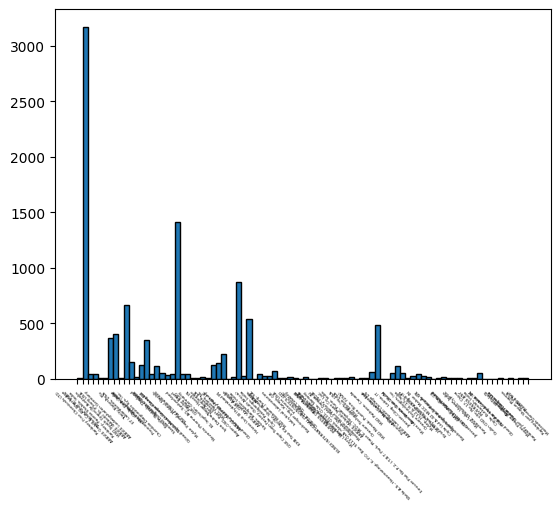

In [40]:
plt.hist(df["manufacturing site"],bins=88,edgecolor="black")
plt.xticks(rotation=135,size=3)
plt.show()

BAR PLOT


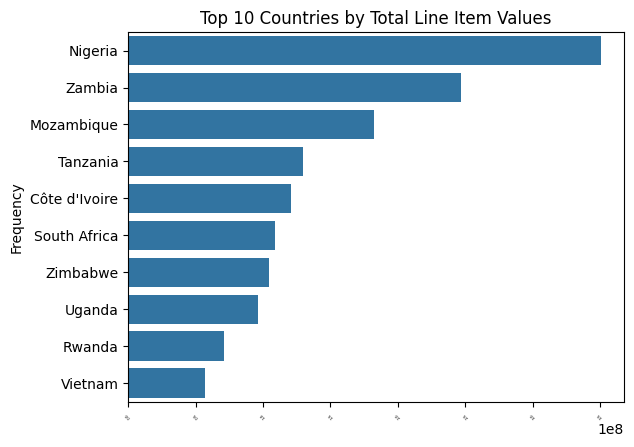

In [42]:
country=df.groupby("country")["line item value"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=country.values,y=country.index)
plt.xticks(rotation=135,size=3)
plt.ylabel("Frequency")
plt.title("Top 10 Countries by Total Line Item Values")
plt.show()

<Axes: ylabel='country'>

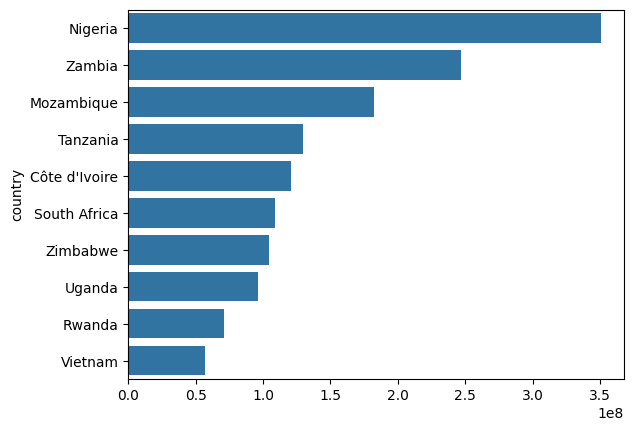

In [43]:
c2=df.groupby("country")["unit price"].mean().sort_values(ascending=False).head()
sns.barplot(x=country.values,y=country.index)

<Axes: ylabel='country'>

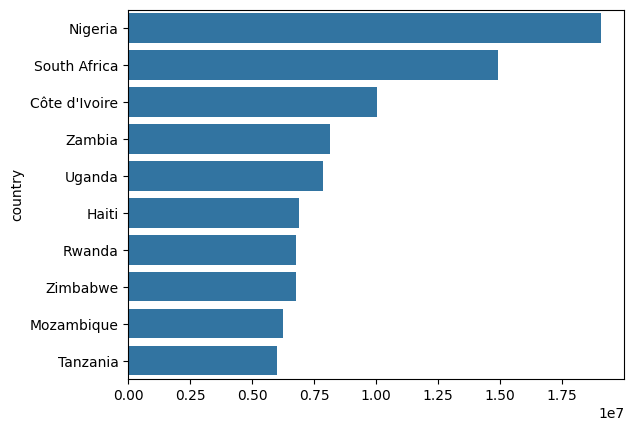

In [89]:
c3=df.groupby("country")["freight cost (usd)"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=c3.values,y=c3.index)

Finding outliers in 'unit price' column

In [48]:
Q1=df["unit price"].quantile(0.25)
Q3=df["unit price"].quantile(0.75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
outliers=df[(df["unit price"]<lb) | (df["unit price"]>ub)]
print(outliers)

          ID project code       country  managed by  fulfill via  \
11        61   110-ZM-T01        Zambia           2            0   
21        96   102-NG-T01       Nigeria           2            0   
26       134   100-HT-T01         Haiti           2            0   
31       176   102-NG-T01       Nigeria           2            0   
38       361   125-HT-T01         Haiti           2            0   
...      ...          ...           ...         ...          ...   
6562   82004   102-GY-T30        Guyana           2            0   
6569   82062   116-ZA-T30  South Africa           2            0   
6760   82461   107-RW-T30        Rwanda           2            1   
7058   82856   102-SD-T30         Sudan           2            1   
10055  86457   109-TZ-T30      Tanzania           2            1   

       vendor inco term shipment mode scheduled delivery date  \
11                    5           Air              2007-01-08   
21                    5           Air              20

In [49]:
df["unit price"].replace(0,df["unit price"].mean(),inplace=True)

<ipython-input-49-52a532ce8fd1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["unit price"].replace(0,df["unit price"].mean(),inplace=True)


Heatmap

<Axes: >

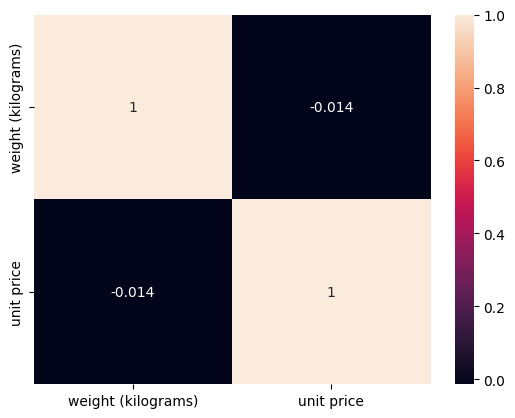

In [50]:
cols=df[["weight (kilograms)","unit price"]]
sns.heatmap(cols.corr(),annot=True)

<Axes: >

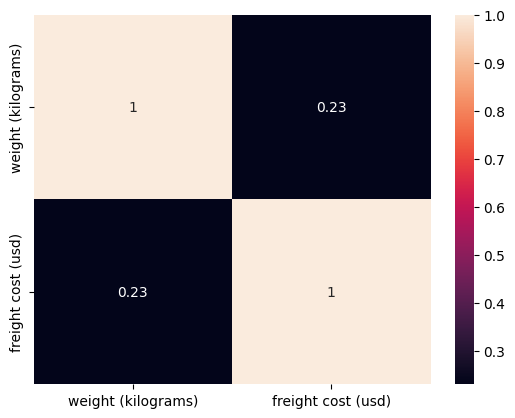

In [51]:
colms=df[["weight (kilograms)","freight cost (usd)"]]
df["freight cost (usd)"]=pd.to_numeric(df["freight cost (usd)"],errors="coerce")
sns.heatmap(colms.corr(),annot=True)

<Axes: >

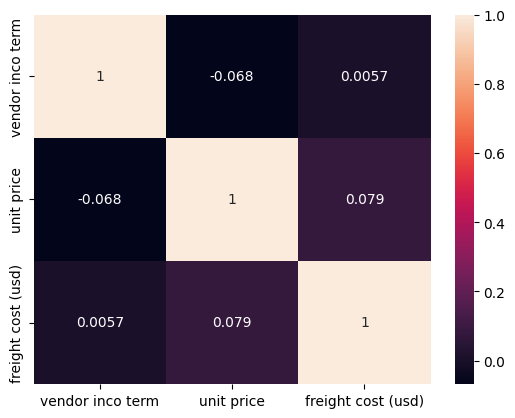

In [52]:
col1=df[["vendor inco term","unit price","freight cost (usd)"]]
sns.heatmap(col1.corr(),annot=True)

<Axes: >

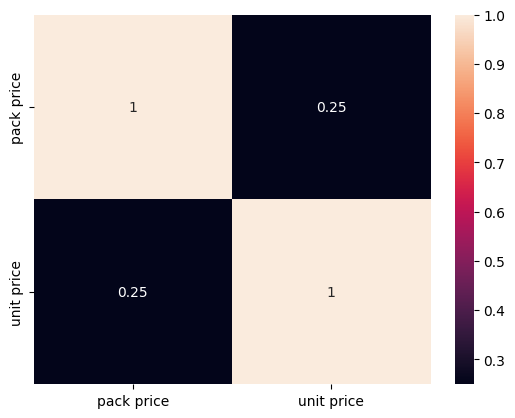

In [53]:
cols3=df[["pack price","unit price"]]
sns.heatmap(cols3.corr(),annot=True)

<Axes: >

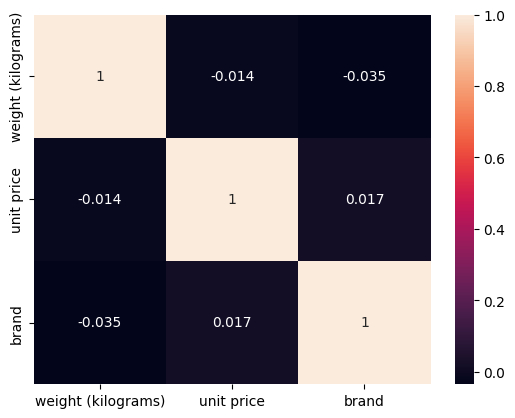

In [54]:
cols4=df[["weight (kilograms)","unit price","brand"]]
sns.heatmap(cols4.corr(),annot=True)

Barplot

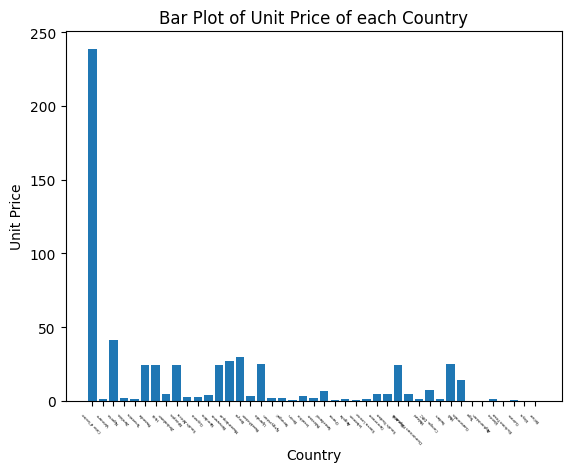

In [55]:
plt.bar(df["country"],df["unit price"])
plt.title("Bar Plot of Unit Price of each Country")
plt.xlabel("Country")
plt.ylabel("Unit Price")
plt.xticks(rotation=135,size=3)
plt.show()

Histogram

<Axes: xlabel='line item insurance (usd)', ylabel='Count'>

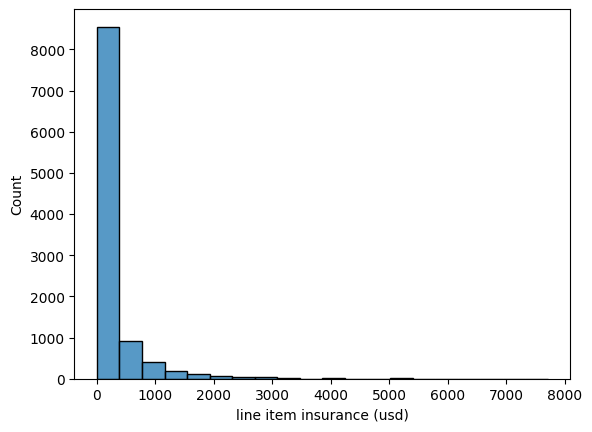

In [57]:
sns.histplot(df["line item insurance (usd)"],kde=False,bins=20)

Pie Chart

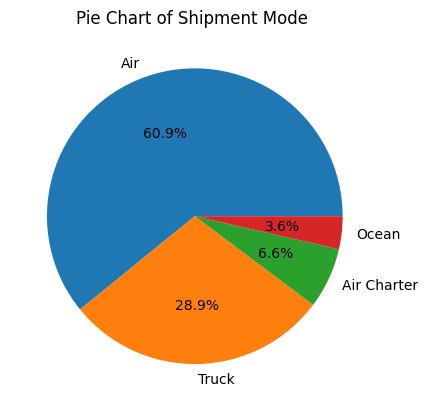

In [58]:
x=df["shipment mode"].value_counts()
plt.pie(x,labels=["Air","Truck","Air Charter","Ocean"],autopct='%1.1f%%')
plt.title("Pie Chart of Shipment Mode ")
plt.show()

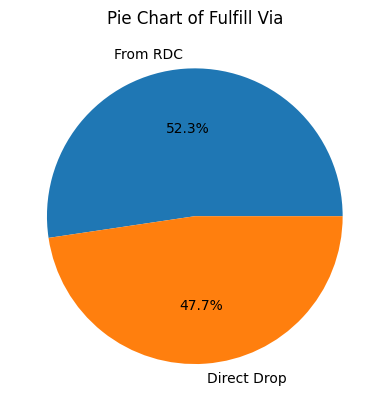

In [59]:
x=df["fulfill via"].value_counts()
plt.pie(x,labels=["From RDC","Direct Drop"],autopct='%1.1f%%')
plt.title("Pie Chart of Fulfill Via")
plt.show()

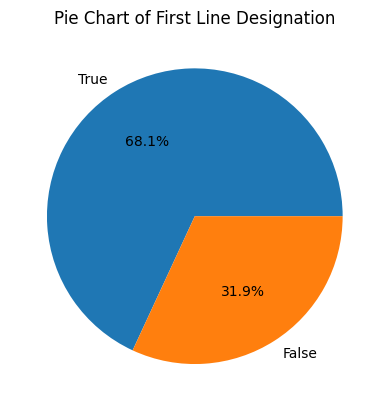

In [60]:
x=df["first line designation"].value_counts()
plt.pie(x,labels=["True","False"],autopct="%1.1f%%")
plt.title("Pie Chart of First Line Designation")
plt.show()

Bar Plot

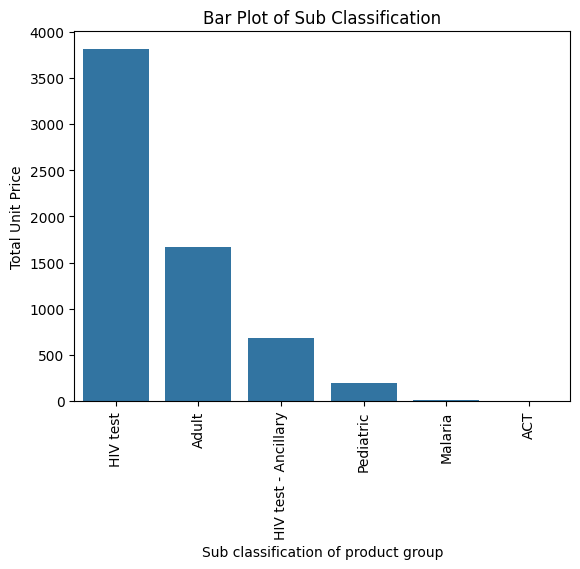

In [61]:
subgroup=df.groupby("sub classification")["unit price"].sum().sort_values(ascending=False)
sns.barplot(x=subgroup.index,y=subgroup.values)
plt.title("Bar Plot of Sub Classification")
plt.xlabel("Sub classification of product group")
plt.ylabel("Total Unit Price")
plt.xticks(rotation=90)
plt.show()

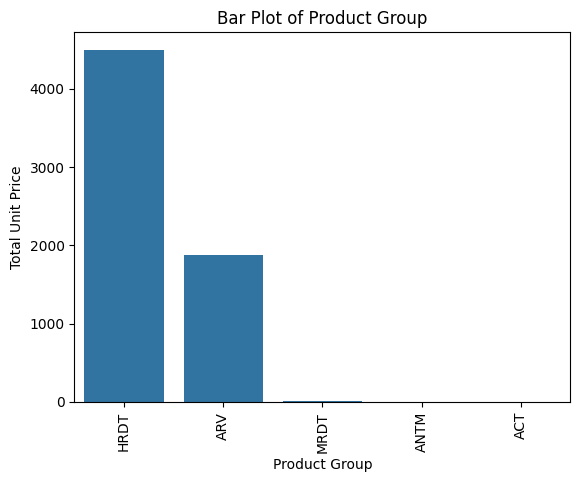

In [62]:
group=df.groupby("product group")["unit price"].sum().sort_values(ascending=False)
sns.barplot(x=group.index,y=group.values)
plt.title("Bar Plot of Product Group")
plt.xlabel("Product Group")
plt.ylabel("Total Unit Price")
plt.xticks(rotation=90)
plt.show()

Heatmap

<Axes: >

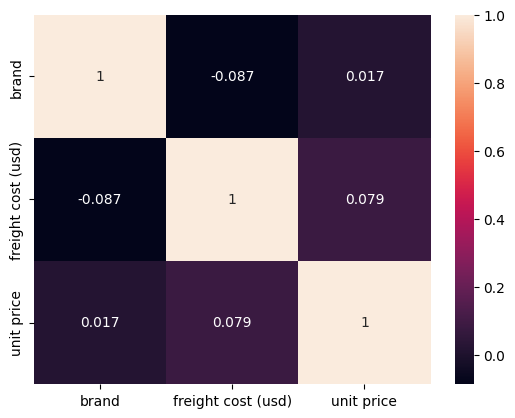

In [63]:
cols5=df[["brand","freight cost (usd)","unit price"]]
sns.heatmap(cols5.corr(),annot=True)

In [67]:
df.drop("managed by",axis=1,inplace=True)

Regression Tasks


In [90]:
c=df[["weight (kilograms)","shipment mode","brand","molecule/test type","unit of measure (per pack)","line item value"]]
d=df["line item insurance (usd)"]

In [91]:
c_train,c_test,d_train,d_test=train_test_split(c,d,test_size=0.2,random_state=42)

Linear Regression

In [92]:
lr_model=LinearRegression()

In [93]:
lr_fit=lr_model.fit(c_train,d_train)

In [95]:
lr_pred=lr_fit.predict(c_test)

In [125]:
lr2=r2_score(d_test,lr_pred)

Random Forest Regression

In [94]:
randomreg_model=RandomForestRegressor()

In [98]:
rreg_fit=randomreg_model.fit(c_train,d_train)

In [99]:
rreg_pred=rreg_fit.predict(c_test)

In [126]:
rr2=r2_score(d_test,rreg_pred)

Since RandomForestRegressor is the best regressor here, we need to find optimizing parameters.

GridSearchCV

In [107]:
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[2,4,6],
    'max_features':[None,"sqrt","log2"]
}

In [109]:
grid_search=GridSearchCV(estimator=randomreg_model,param_grid=param_grid,cv=5)

In [110]:
grid_search_fit=grid_search.fit(c_train,d_train)

In [111]:
grid_search_fit.best_params_

{'max_depth': 6, 'max_features': None, 'n_estimators': 200}

Support Vector Regression

In [112]:
sreg_model=SVR()

In [113]:
svr_fit=sreg_model.fit(c_train,d_train)

In [114]:
svr_pred=svr_fit.predict(c_test)

In [127]:
sr2=r2_score(d_test,svr_pred)

KNN Regression


In [120]:
knn_model=KNeighborsRegressor()

In [117]:
knn_fit=knn_model.fit(c_train,d_train)

In [118]:
knn_pred=knn_fit.predict(c_test)

In [128]:
kr2=r2_score(d_test,knn_pred)

In [129]:
models=pd.DataFrame({
    "Model":["Linear Regression","Random Forest Regression","Support Vector Regression","KNN Regression"],
    "R2 Score":[lr2,rr2,sr2,kr2]
})

In [130]:
models

,Model,R2 Score
0,Linear Regression,0.914488
1,Random Forest Regression,0.937379
2,Support Vector Regression,0.488107
3,KNN Regression,0.918357


Conclusion: After evaluating multiple regression models, Random Forest Regression emerged as the best-performing predictor for this dataset, achieving the highest R² score of 0.9373. This indicates that the model explains 93.73% of the variance in shipment pricing, making it a highly effective choice for prediction.